# Python TD1
## 0.1 Exercices de base

1. Prendre une liste et créer une liste sans doublons, dans un premier temps on supposera la
première liste triée, puis on considèrera le cas général [1,2,3,3,4,4] -> [1,2,3,4]

In [154]:
def doublons(liste):
    res = []
    res.append(liste[0])
    for i in range(1, len(liste)):
        if liste[i] != liste[i - 1]:
            res.append(liste[i])
    return res

l = [1, 2, 3, 3, 4, 4, 5]
print(doublons(l));

[1, 2, 3, 4, 5]


In [155]:
def doublons2(liste):
    res = []
    for e in liste:
        res.append(e)
    res.sort();
    return doublons(res)

l = [1, 3, 2, 3, 5, 4, 4]
print(doublons2(l))

[1, 2, 3, 4, 5]


3. Extraire d’une liste d’entiers les valeurs consécutives qui se suivent, par exemple
[3,8,9,10,9,15,16] -> [(8,9),(9,10),(15,16)]

In [156]:
def exo3(liste):
    res = []
    for i in range(1, len(liste)):
        if liste[i] == liste[i-1] + 1:
            res.append((liste[i-1], liste[i]))
    return res
l = [3,8,9,10,9,15,16]
print(exo3(l))

[(8, 9), (9, 10), (15, 16)]


4. Comptez (dans un dictionnaire) le nombre d’occurrence d’éléments contenus dans une liste.
Par exemple [“a”,“b”,“a”,“c”,“c”] -> {“b”:1, “a”:2, “c”:2}

In [157]:
def occurences(liste):
    res = {}
    for element in liste:
        res[element] = res.get(element, 0) + 1
    return res
l = ["a","b","a","c","c"]
print(occurences(l))

{'a': 2, 'b': 1, 'c': 2}


5. Faire une table qui enregistre les combinaisons de deux dés à six faces, avec comme clefs la
valeur de la somme des deux dés et comme valeurs les combinaisons de deux dés.

In [158]:
def exo5():
    res = {}
    for i in range(1,7):
        for j in range(1,7):
            total = i+j
            if total in res:
                res[total].append((i,j))
            else:
                res[total] = [(i, j)]
    return res
print(exo5())

{2: [(1, 1)], 3: [(1, 2), (2, 1)], 4: [(1, 3), (2, 2), (3, 1)], 5: [(1, 4), (2, 3), (3, 2), (4, 1)], 6: [(1, 5), (2, 4), (3, 3), (4, 2), (5, 1)], 7: [(1, 6), (2, 5), (3, 4), (4, 3), (5, 2), (6, 1)], 8: [(2, 6), (3, 5), (4, 4), (5, 3), (6, 2)], 9: [(3, 6), (4, 5), (5, 4), (6, 3)], 10: [(4, 6), (5, 5), (6, 4)], 11: [(5, 6), (6, 5)], 12: [(6, 6)]}


7. Faire l’inversion (clefs/valeurs) d’une table

In [159]:
def inv_dict(d):
    res = {}
    for (key, value) in d.items():
        if value in res:
            res[value].append(key)
        else:
            res[value] = [key]
    return res
d = {1 : "a", 2 : "b", 3 : "a", 5 : "c", 198928 : "a", "pi" : 3.1415, "oui" : "b", "non" : ":("}
print(inv_dict(d))

{'a': [1, 3, 198928], 'b': [2, 'oui'], 'c': [5], 3.1415: ['pi'], ':(': ['non']}


8. Faire une fonction qui teste si deux mots ont les mêmes lettres; en faire une autre qui teste
si ce sont des anagrammes (c’est-à-dire qu’ils ont les mêmes lettres le même nombre de fois).

In [160]:
def meme_lettres(a,b):
    return set(a) == set(b)
print(meme_lettres("chienne", "niche"))


def anagramme(a, b):
    la = list(a)
    lb = list(b)
    la.sort()
    lb.sort()
    return la == lb
print(anagramme("chienne", "niche"))
print(anagramme("chien", "niche"))

True
False
True


## 0.2 Problèmes:
• définir un ensemble de fonctions pour manipuler des représentations de polynômes

In [161]:
def print_polynome(p):
    keys = list(p.keys())
    keys.sort(reverse = True)
    first = True
    for key in keys:
        val = p[key]
        if not first:
            if val < 0:
                print("-", end = " ")
                val -= 2 * val
            else:
                print("+", end = " ")
        else:
            first = False
                
        if val != 1:
            print(str(val), end = "")
            
        if key == 1:
            print("x", end = " ")
        elif key != 0:
            print("x^" + str(key), end = " ")
            

In [162]:
def somme(p, q):
    res = {}
    for (key, value) in p.items():
        res[key] = value
    for (key, value) in q.items():
        total = res.get(key, 0) + value
        if (total != 0):
            res[key] = total
        else:
            del res[key]
    return res
p = {0:3, 1:5, 2: 1, 4:4}
q = {4: -4, 2: -4, 1:2, 6:9}
print_polynome(somme(p,q))

9x^6 - 3x^2 + 7x + 3

In [163]:
def multiplication(p, q):
    res = {}
    for (key, value) in p.items():
        for(key2, value2) in q.items():
            total = value * value2 + res.get(key + key2, 0)
            if (total == 0):
                del res[key + key2]
            else :
                res[key + key2] = total
    return res
print_polynome(multiplication(p,q))

36x^10 - 7x^8 + 45x^7 + 7x^6 - 12x^5 - 16x^4 - 18x^3 - 2x^2 + 6x 

In [164]:
def derivee(p):
    res = {}
    for (key, value) in p.items():
        if key != 0:
            res[key-1] = value * key
    return res
q = {4: -4, 2: -4, 1:2, 6:9}
print_polynome(derivee(q))

54x^5 - 16x^3 - 8x + 2

# Numpy

In [165]:
import numpy as np
from math import cos

r = np.random.random(1000)

# le type est un vecteur (une liste de taille fixe)
# ndarray -> vecteur numérique
print(type(r))
print(r.mean(), r.min(), r.max())

<class 'numpy.ndarray'>
0.5068766847527161 0.003512876278542354 0.9966105931781284


# Calcul vectorisé

In [166]:
from math import cos
#c = cos(r) # ??????

r**2

array([3.28421080e-01, 4.15202146e-01, 3.39867162e-01, 1.73388530e-01,
       3.98351196e-01, 2.66456588e-02, 7.15706814e-01, 3.17210444e-01,
       7.95655794e-02, 8.46372203e-01, 7.72648177e-05, 5.79934204e-01,
       4.14120825e-03, 6.83284232e-01, 6.47970482e-01, 3.28232970e-01,
       3.42968521e-01, 6.52431915e-04, 9.87187545e-02, 1.98164512e-02,
       2.04856680e-01, 4.70983462e-01, 8.83481909e-01, 6.99040081e-03,
       1.02434103e-03, 5.98932729e-02, 4.05130646e-01, 8.88853654e-01,
       1.19985139e-03, 1.20657205e-03, 4.74141335e-01, 1.08505905e-02,
       5.63698503e-04, 1.23493652e-01, 1.59987761e-01, 1.41173651e-02,
       9.43876292e-01, 2.08719412e-02, 9.52045961e-01, 6.74801007e-01,
       2.07977642e-02, 4.78110934e-01, 6.16033480e-01, 8.24119459e-01,
       7.54072266e-01, 8.01355263e-01, 8.62708999e-01, 6.64048923e-01,
       6.44899381e-01, 1.45311288e-01, 9.07212582e-01, 8.65479737e-02,
       3.86469357e-01, 2.77614803e-01, 3.58122909e-01, 1.11267877e-01,
      

In [167]:
r.shape

(1000,)

In [168]:
r2 = r.reshape(r.shape[0]//100, 100)
r2.shape

(10, 100)

In [169]:
c = np.arange(0., 3.2, 0.05)
cos(c)

TypeError: only size-1 arrays can be converted to Python scalars

In [ ]:
c = np.linspace(0., 3.2, 101)
c

In [178]:
np.argwhere((r > 0.55) | (r < 0.2))
# Retourne les indices pour lesquels les valeurs suivent la condition
# On peut utiliser les conditions également pour récupérer les valeurs
# On appelle ça un masque binaire
print(r[(r > 0.55) | (r < 0.2)])

[0.57308034 0.64436181 0.58298127 0.63115069 0.16323498 0.84599457
 0.56321439 0.91998489 0.00879004 0.76153411 0.06435222 0.82661008
 0.80496614 0.5729162  0.58563514 0.02554275 0.14077092 0.68628235
 0.93993718 0.08360862 0.03200533 0.63649874 0.94279036 0.03463887
 0.03473575 0.68857921 0.10416617 0.02374234 0.11881652 0.97153296
 0.14447125 0.97572843 0.82146272 0.1442143  0.69145566 0.784878
 0.90781026 0.86837334 0.89518449 0.9288213  0.81489197 0.80305628
 0.95247708 0.6216666  0.59843371 0.92841704 0.07335764 0.82218747
 0.58147825 0.62447124 0.70096356 0.55819992 0.04160397 0.87825824
 0.16001105 0.74347676 0.08093862 0.68966769 0.0137068  0.17154435
 0.01165615 0.76672225 0.81447468 0.86585741 0.77189008 0.13258487
 0.77494221 0.59723686 0.89782131 0.07740583 0.79907687 0.66291696
 0.72773243 0.94812716 0.1482229  0.70400063 0.66486602 0.07711671
 0.98825418 0.72675982 0.9964297  0.82522375 0.67347164 0.75135151
 0.18272379 0.59120639 0.57378776 0.01417851 0.05131525 0.795264

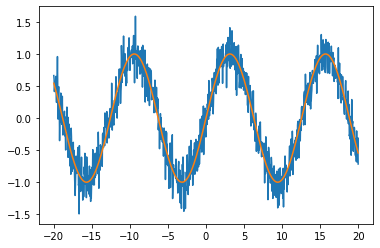

In [185]:
import pylab
from numpy import sin

x = np.linspace(-20, 20, 1000)
a0 = sin(x/2.)
a = a0 + np.random.normal(scale=0.2,size=1000)
f = pylab.plot(x,a)
g = pylab.plot(x,a0)

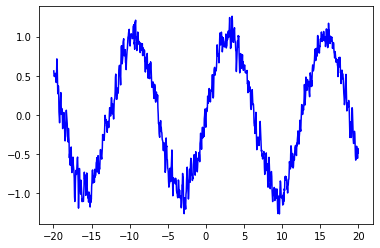

In [194]:
# moyenne glissante
c = np.copy(a[1:-1])
c += a[:-2] + a[2:]
c *= 1./3
#c = (a[:-2]+a[-1:1]+a[2:])/3
f1 = pylab.plot(x[1:-1],c,"b")
